# Matching and finding relavant jobs for a Resume

In [1]:
import numpy as np
import pandas as pd
import json
import matplotlib.pyplot as plt
%matplotlib inline

import re
import datetime
from datetime import date
from time import strptime

from sklearn.metrics.pairwise import cosine_similarity

In [2]:
# reading my sorted resume csv
resume = pd.read_csv('wip/latest_sorted_resume.csv')


In [4]:
# reading my sortedjob csv
job = pd.read_csv('wip/sorted_jobs_master.csv')

In [6]:
# Column names should match the columns in job dataset
resume.rename(columns={'Is_grad': 'is_grad','Is_postgrad': 'is_postgrad','Is_doc': 'is_doc'}, inplace=True) 

In [7]:
# resume features to be matched with jobs
r_df = resume[['resume_id','experience_range','is_grad','is_postgrad','is_doc']]
#r_df.head()

In [20]:
#My recommender system to find best jobs for a given resume
def jobs_recommender(r) :
    
    #job features need to be matched with resume
    job_m = related_jobs[['j_id','experience_range','is_grad','is_postgrad','is_doc']]

    #Store the results in this DF
    matched_jobs = pd.DataFrame(columns = ["id","company","job_title","jobdescription","experience_range","is_grad","similarity"] )
    
    r= r.to_numpy()
    r= r.reshape(1, -1)
    #Go through ALL the related jobs
    for jd in job_m['j_id'] :
        #print(f'jd is {jd}')        
        #Find the similarity of the jobs with resume
        jobs = job_m.loc[jd]
        jobs = jobs.to_numpy()
        jobs = jobs.reshape(1, -1)
        #print(f'job is {jobs}')
        #print(f'r is {r}')
        #print(f'job is {job}')
        similarity = cosine_similarity(r,jobs)
        #print(f'similarity is {similarity}')
        matched_jobs.loc[len(matched_jobs)] = [jd,
                                               related_jobs['company'][jd],
                                               related_jobs['jobtitle'][jd],
                                               related_jobs['jobdescription'][jd],
                                               related_jobs['experience_range'][jd],
                                               related_jobs['is_grad'][jd],
                                               similarity[0][0]]
        

    return matched_jobs.sort_values(by=['similarity'],ascending=False)[1:]

### Example 0.  - matching and recommending jobs for a developer

In [13]:
# r1 contrains the only features to be matched of slected resume
# make yor selection and input resume id here
r1= r_df.loc[1]
r1

resume_id           1
experience_range    0
is_grad             1
is_postgrad         1
is_doc              0
Name: 1, dtype: int64

In [25]:
#from pool of 22,000 jobs, selecting jobs that are releated to sql dba (resume in question)
related_jobs = job #.loc[job['jobtitle'].str.contains("developer")]

In [26]:
# call recommender by passing selected resume 
matched_jobs = jobs_recommender(r1)
matched_jobs = matched_jobs.head(10)

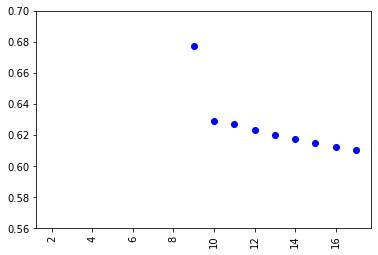

,id,company,job_title,jobdescription,experience_range,is_grad,similarity
2,2,Softtech Career Infosystem Pvt. Ltd,pl/sql developer - sql,Job Description Send me Jobs like this - as ...,1,1,0.707107
9,9,Spire Technologies and Solutions Pvt. Ltd.,java technical lead (6-8 yrs) -,Job Description Send me Jobs like this Pleas...,2,1,0.677003
10,10,PFS Web Global Services Pvt Ltd,walk in - as400 developer - pfsweb global serv...,Job Description Send me Jobs like this We ar...,1,1,0.628828
11,11,Kinesis Management Consultant Pvt. Ltd,php developer,Job Description Send me Jobs like this exper...,0,1,0.627250
12,12,Kinesis Management Consultant Pvt. Ltd,php developer,Job Description Send me Jobs like this exper...,0,1,0.623302
13,13,Kinesis Management Consultant Pvt. Ltd,php developer,Job Description Send me Jobs like this exper...,0,1,0.619930
14,14,Kinesis Management Consultant Pvt. Ltd,php developer,Job Description Send me Jobs like this exper...,0,1,0.617018
15,15,Kinesis Management Consultant Pvt. Ltd,php developer,Job Description Send me Jobs like this exper...,0,1,0.614476
16,16,Kinesis Management Consultant Pvt. Ltd,php developer,Job Description Send me Jobs like this exper...,0,1,0.612240
17,17,Kinesis Management Consultant Pvt. Ltd,php developer,Job Description Send me Jobs like this exper...,0,1,0.610257


In [27]:
# Plotting graph to visualize 10 best jobs
x=matched_jobs['id']
y=matched_jobs['similarity']
plt.scatter(x, y,c='Blue')
plt.xticks(rotation=90)
#plt.scatter(resume['Resume_title'][2405],1,c='Red', marker='+')
axes = plt.gca()
axes.set_ylim([0.56,.7])
plt.show()
matched_jobs

### Example 1.  - matching and recommending jobs for a sql dba

In [9]:
#picking a random resume from resume dataset
resume.loc[resume['Resume_title'].str.contains("sql dba")]

,index,Resume_title,City,State,Description,work_experiences,Educations,Skills,Links,Certificates,...,edu_unknown,Computer_Eng,Finance,HR,AI_stats,MBA,Other_specialization,resume_id,total_experience,experience_range
1,1,software developer,Bengaluru,Karnataka,Working as Software Developer at IngroInfo Sof...,"{0: [{'wtitle:': 'JAVA DEVELOPER'}, {'wcompany...",{0: [{'e_title:': 'MCA in Master of Computer A...,"['programming languages: core java', ' j2ee \n...","['http://github.com/NK-PATEL/Train_Project', '...",{},...,0,1,0,0,0,0,0,1,1,0
141,141,software developer,Madurai,Tamil Nadu,NONE,"{0: [{'wtitle:': 'JAVA DEVELOPER'}, {'wcompany...",{0: [{'e_title:': 'B. TECH in INFORMATION TECH...,"['achivements and activities', ' conferred wit...",[],{},...,0,1,0,0,0,0,0,141,1,0
173,173,software developer,Dehra Dun,Uttarakhand,Willing to work in a challenging position with...,"{0: [{'wtitle:': 'Java developer'}, {'wcompany...","{0: [{'e_title:': 'MCA'}, {'e_schoolname:': 'U...","['java', ' c++']",[],{},...,0,1,0,0,0,0,0,173,0,0
231,231,software developer with 6 month experience,Chennai,Tamil Nadu,• Strong understanding of object oriented prog...,"{0: [{'wtitle:': 'JAVA DEVELOPER'}, {'wcompany...","{0: [{'e_title:': ""Bachelor's in Mechanical""},...","['java', ' sql', ' c++', ' c', ' css', ' javas...",[],{},...,0,1,0,0,0,0,0,231,1,0
248,248,software developer,Bengaluru,Karnataka,Working as one of the board of directors and a...,"{0: [{'wtitle:': 'Java Developer'}, {'wcompany...",{0: [{'e_title:': 'Bachelors Of Technology in ...,"['spring mvc', ' java', ' servlets', ' hiberna...",[],{},...,0,1,0,0,0,0,0,248,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
13754,13754,software developer ( java),NONE,NONE,"To use my creative skills, technologies that I...",{0: [{'wtitle:': 'Software Developer ( Java)'}...,"{0: [{'e_title:': ""Bachelor's in Computer scie...",['java\nc++'],[],{},...,0,1,0,0,0,0,0,13754,1,0
13755,13755,software developer,Safdarganj,Uttar Pradesh,NONE,"{0: [{'wtitle:': 'Java developer fresher'}, {'...","{0: [{'e_title:': 'Mca in Csit'}, {'e_schoolna...","['java (less than 1 year)', ' jsp', 'html', 'w...",[],"{0: [{'c_title:': 'Java training'}, {'c_durati...",...,0,1,0,0,0,0,0,13755,0,0
13756,13756,software developer,Thane,Maharashtra,A highly organized and hard-working individual...,"{0: [{'wtitle:': 'Junior Java Developer'}, {'w...",{0: [{'e_title:': 'BSc in Information Technolo...,"['linux', ' css', ' c++', ' bootstrap', ' java...",[],{},...,0,1,0,0,0,0,0,13756,0,0
13772,13772,software developer ( java),NONE,NONE,Seeking to handle increasing responsibility an...,{0: [{'wtitle:': 'Software Developer ( Java)'}...,{0: [{'e_title:': 'BE in Development of Advanc...,"['eclipse', ' java', ' jsp', ' html', ' javasc...",[],{},...,0,1,0,0,0,0,0,13772,0,0


In [12]:
# r1 contrains the only features to be matched of slected resume
# make yor selection and input resume id here
r1= r_df.loc[2405]
r1

resume_id           248
experience_range      0
is_grad               1
is_postgrad           0
is_doc                0
Name: 248, dtype: int64

In [131]:
#from pool of 22,000 jobs, selecting jobs that are releated to sql dba (resume in question)
related_jobs = job.loc[job['jobdescription'].str.contains("sql dba")]
#job features need to be matched with resume
job_m = related_jobs[['j_id','experience_range','is_grad','is_postgrad','is_doc']]

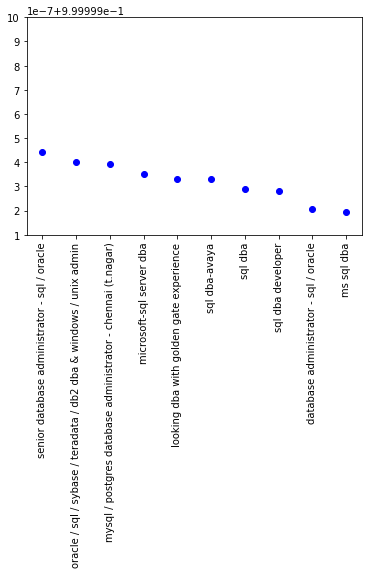

,id,company,job_title,jobdescription,experience_range,is_grad,similarity
5,9621,Axis Jobs,senior database administrator - sql / oracle,Job Description Send me Jobs like this Insta...,2,1,0.999999
0,4583,ANTHROPLACE Consulting Pvt Ltd hiring for Fort...,oracle / sql / sybase / teradata / db2 dba & w...,Job Description Send me Jobs like this We ar...,1,1,0.999999
1,5041,Gee Ess Technology Solutions hiring for Mysql ...,mysql / postgres database administrator - chen...,Job Description Send me Jobs like this Greet...,1,1,0.999999
4,7634,Thakral One Solutions Pvt. Ltd.,microsoft-sql server dba,Job Description Send me Jobs like this SQL S...,1,1,0.999999
10,21865,Mount Climb HR Solutions Private Limited,looking dba with golden gate experience,Job Description Send me Jobs like this Senio...,2,1,0.999999
7,10593,Careernet Technologies Pvt Ltd,sql dba-avaya,Job Description Send me Jobs like this Dear ...,1,1,0.999999
8,16711,Client of sampoorna,sql dba,Job Description Send me Jobs like this Insta...,1,1,0.999999
9,19881,ECENTRICHR,sql dba developer,Job Description Send me Jobs like this Job D...,1,1,0.999999
6,9803,Axis Jobs,database administrator - sql / oracle,Job Description Send me Jobs like this Insta...,0,1,0.999999
3,7161,Iqura Technologies Pvt. Ltd.,ms sql dba,Job Description Send me Jobs like this Job D...,0,1,0.999999


In [142]:
# call recommender by passing selected resume 
matched_jobs = jobs_recommender(r1)
matched_jobs = matched_jobs.head(10)
# Plotting graph to visualize 10 best jobs
x=matched_jobs['job_title']
y=matched_jobs['similarity']
plt.scatter(x, y,c='Blue')
plt.xticks(rotation=90)
#plt.scatter(resume['Resume_title'][2405],1,c='Red', marker='+')
axes = plt.gca()
axes.set_ylim([.9999991,1])
plt.show()
matched_jobs


### Example 2.   matching and recommending jobs for a python dev

In [145]:
#picking a random resume from resume dataset
#resume.loc[resume['Resume_title'].str.contains("python dev")]

# r1 contrains the only features to be matched of slected resume
# make yor selection and input resume id here
r1= r_df.loc[1472]


In [157]:
#from pool of 22,000 jobs, selecting jobs that are releated to sql dba (resume in question)
related_jobs = job.loc[job['jobtitle'].str.contains("python")]
#job features need to be matched with resume
job_m = related_jobs[['j_id','experience_range','is_grad','is_postgrad','is_doc']]

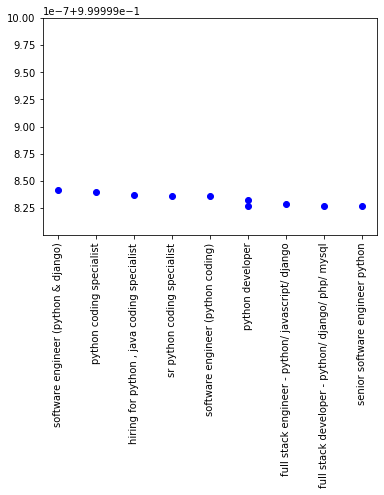

,id,company,job_title,jobdescription,experience_range,is_grad,similarity
12,5735,HACKEREARTH INC,software engineer (python & django),Job Description Send me Jobs like this Take ...,0,1,1.0
15,6198,Taurus Hard Soft Solutions Pvt. Ltd.,python coding specialist,Job Description Send me Jobs like this Compa...,0,1,1.0
19,6738,Taurus Hard Soft Solutions Pvt. Ltd.,"hiring for python , java coding specialist",Job Description Send me Jobs like this Compa...,0,1,1.0
21,6825,Taurus Hard Soft Solutions Pvt. Ltd.,sr python coding specialist,Job Description Send me Jobs like this Compa...,0,1,1.0
22,6915,Taurus Hard Soft Solutions Pvt. Ltd.,software engineer (python coding),Job Description Send me Jobs like this Compa...,0,1,1.0
24,9060,OPENSPACE SERVICES,python developer,Job Description Send me Jobs like this Respo...,1,1,1.0
27,9626,SquarerootÂ,full stack engineer - python/ javascript/ django,Job Description Send me Jobs like this We ar...,1,1,1.0
30,10046,Zyoin,full stack developer - python/ django/ php/ mysql,Job Description Send me Jobs like this Roles...,1,1,1.0
14,5826,Soliton Technologies Pvt Ltd,senior software engineer python,Job Description Send me Jobs like this Job D...,1,1,1.0
13,5742,Globussoft Technologies Pvt. Ltd.,python developer,Job Description Send me Jobs like this Banga...,1,1,1.0


In [160]:
# Just need to pass a selected resume to get related jobs 
matched_jobs = jobs_recommender(r1)
matched_jobs = matched_jobs.head(10)
# Plotting graph to visualize 10 best jobs
x=matched_jobs['job_title']
y=matched_jobs['similarity']
plt.scatter(x, y,c='Blue')
plt.xticks(rotation=90)
#plt.scatter(resume['Resume_title'][2405],1,c='Red', marker='+')
axes = plt.gca()
axes.set_ylim([.9999998,1])
plt.show()
matched_jobs

In [162]:
#picking a random resume from resume dataset
#resume.loc[resume['Resume_title'].str.contains("java dev")]

# r1 contrains the only features to be matched of slected resume
# make yor selection and input resume id here
r1= r_df.loc[13771]

In [164]:
#from pool of 22,000 jobs, selecting jobs that are releated to sql dba (resume in question)
related_jobs = job.loc[job['jobtitle'].str.contains("java")]
print(f'Matching with {related_jobs.shape[0]} jobs')
#job features need to be matched with resume
job_m = related_jobs[['j_id','experience_range','is_grad','is_postgrad','is_doc']]

Matching with 793 jobs


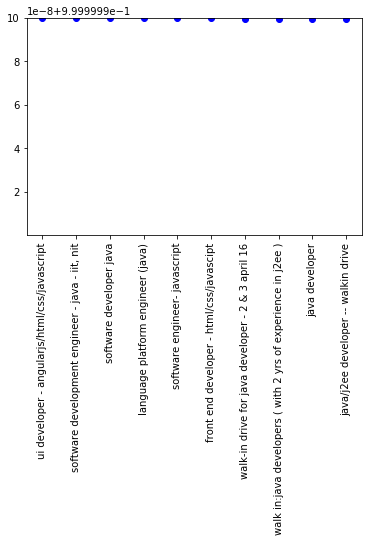

,id,company,job_title,jobdescription,experience_range,is_grad,similarity
572,15514,VidPro Consultancy Services,ui developer - angularjs/html/css/javascript,Job Description Send me Jobs like this Requi...,0,1,1.0
573,15516,People Gamut HR Solutions,"software development engineer - java - iit, nit",Job Description Send me Jobs like this Posit...,0,1,1.0
500,12291,QuantumLink Communications Pvt Ltd,software developer java,Job Description Send me Jobs like this Mumba...,0,1,1.0
594,15773,Reverie Language Technologies - Startup,language platform engineer (java),Job Description Send me Jobs like this Somet...,0,1,1.0
634,17977,SnapShopr - Startup,software engineer- javascript,Job Description Send me Jobs like this Job D...,0,1,1.0
426,10941,Axcess Consultancy services,front end developer - html/css/javascipt,Job Description Send me Jobs like this Notic...,0,1,1.0
388,10384,Talocity,walk-in drive for java developer - 2 & 3 april 16,Job Description Send me Jobs like this Dream...,0,1,1.0
708,20627,Infobrain Technologies Pvt. Ltd.,walk in:java developers ( with 2 yrs of experi...,Job Description Send me Jobs like this We ar...,0,1,1.0
709,20630,Tradeleaves India Pvt Ltd,java developer,Job Description Send me Jobs like this Greet...,0,1,1.0
713,20711,Ojas Innovative Technologies Private Limited,java/j2ee developer -- walkin drive,Job Description Send me Jobs like this Hi Al...,0,1,1.0


In [167]:
# Just need to pass a selected resume to get related jobs 
matched_jobs = jobs_recommender(r1)
matched_jobs = matched_jobs.head(10)
# Plotting graph to visualize 10 best jobs
x=matched_jobs['job_title']
y=matched_jobs['similarity']
plt.scatter(x, y,c='Blue')
plt.xticks(rotation=90)
#plt.scatter(resume['Resume_title'][2405],1,c='Red', marker='+')
axes = plt.gca()
axes.set_ylim([.9999999,1])
plt.show()
matched_jobs